<a href="https://colab.research.google.com/github/hsss/pytorch_tutorial/blob/master/example/01_MNIST_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python tutorial

In [1]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision import datasets, transforms

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print(cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    
    


Populating the interactive namespace from numpy and matplotlib
True


In [0]:
batch_size = 50
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

In [0]:

# One hidden Layer NN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1) 
    
    
model = Net()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [7]:
device = torch.device("cuda" if cuda else "cpu")

EPOCHS = 5
losses = []

model.train()

    
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
   

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.304605
Train Epoch: 0 [5000/60000 (8%)]	Loss: 0.185979
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.167006
Train Epoch: 0 [15000/60000 (25%)]	Loss: 0.261411
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.143425
Train Epoch: 0 [25000/60000 (42%)]	Loss: 0.066002
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.010686
Train Epoch: 0 [35000/60000 (58%)]	Loss: 0.153066
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.077370
Train Epoch: 0 [45000/60000 (75%)]	Loss: 0.029421
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.010437
Train Epoch: 0 [55000/60000 (92%)]	Loss: 0.018421
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.070882
Train Epoch: 1 [5000/60000 (8%)]	Loss: 0.014759
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.006700
Train Epoch: 1 [15000/60000 (25%)]	Loss: 0.141002
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.004379
Train Epoch: 1 [25000/60000 (42%)]	Loss: 0.003722
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.000443
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.001860
Train Epoch: 1

In [8]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.0420, Accuracy: 9871/10000 (99%)



In [0]:
MNIST_train = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

In [13]:
print(MNIST_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train


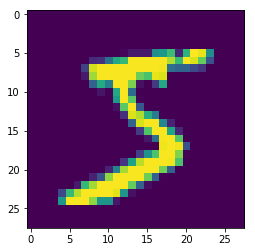

In [22]:
example = np.array(MNIST_train.data[0].cpu(), np.float32)
plt.imshow(example)